<a href="https://colab.research.google.com/github/Arvind-Khoda/ML_Lab/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing Dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
data=sns.load_dataset('iris')

In [7]:
data=pd.DataFrame(data)

In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
new_data=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [17]:
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
for col in new_data.columns:
  data[col]=scaler.fit_transform(np.array(data[col]).reshape(len(data[col]),1))

In [19]:
from sklearn.cluster import KMeans
#Finding number of clusting using elbow method
wcss=[]
for i in range(1,11):
  Km=KMeans(n_clusters=i)
  Km.fit(new_data)
  wcss.append(Km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

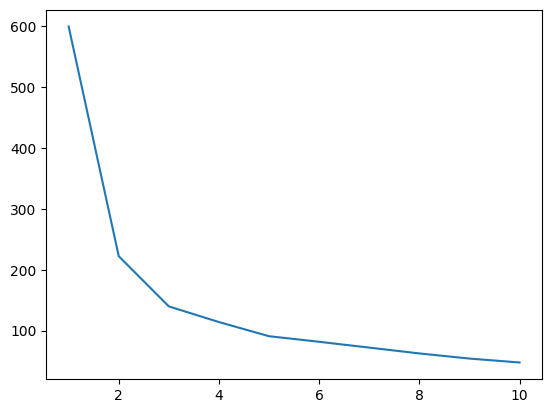

In [21]:
plt.plot(range(1,11),wcss)

In [22]:
#Buidling model
model=KMeans(n_clusters=3)
label=model.fit_predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

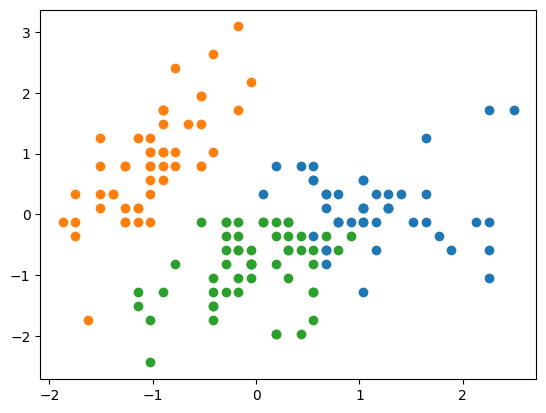

In [28]:
plt.scatter(data['sepal_length'][label==0],data['sepal_width'][label==0])
plt.scatter(data['sepal_length'][label==1],data['sepal_width'][label==1])
plt.scatter(data['sepal_length'][label==2],data['sepal_width'][label==2])


In [32]:
#Using dbscan
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)

In [33]:
#Training
dbscan.fit(new_data)

DBSCAN()

In [37]:
l=dbscan.labels_

In [36]:
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

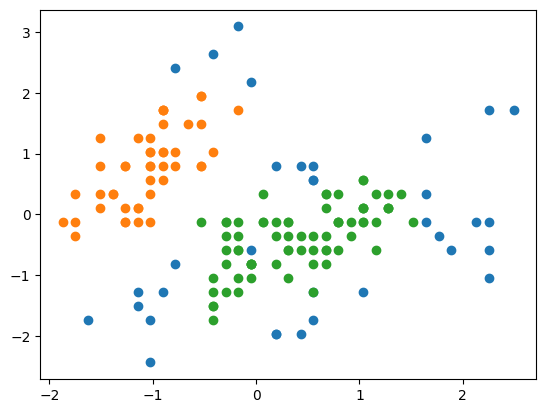

In [38]:
plt.scatter(data['sepal_length'][l==-1],data['sepal_width'][l==-1])
plt.scatter(data['sepal_length'][l==0],data['sepal_width'][l==0])
plt.scatter(data['sepal_length'][l==1],data['sepal_width'][l==1])